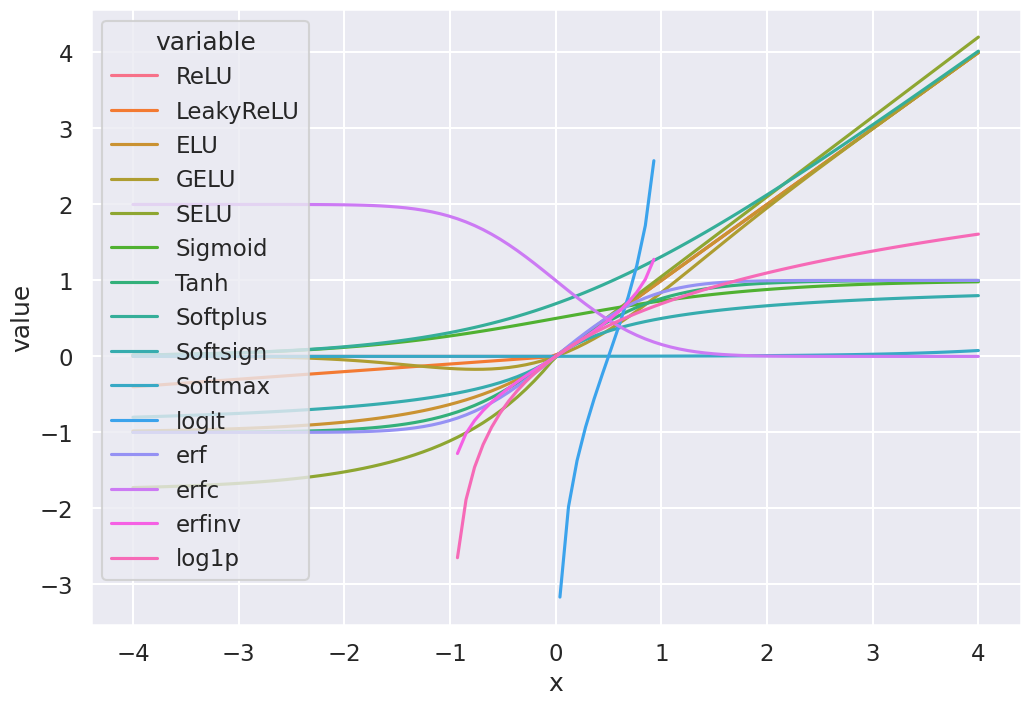

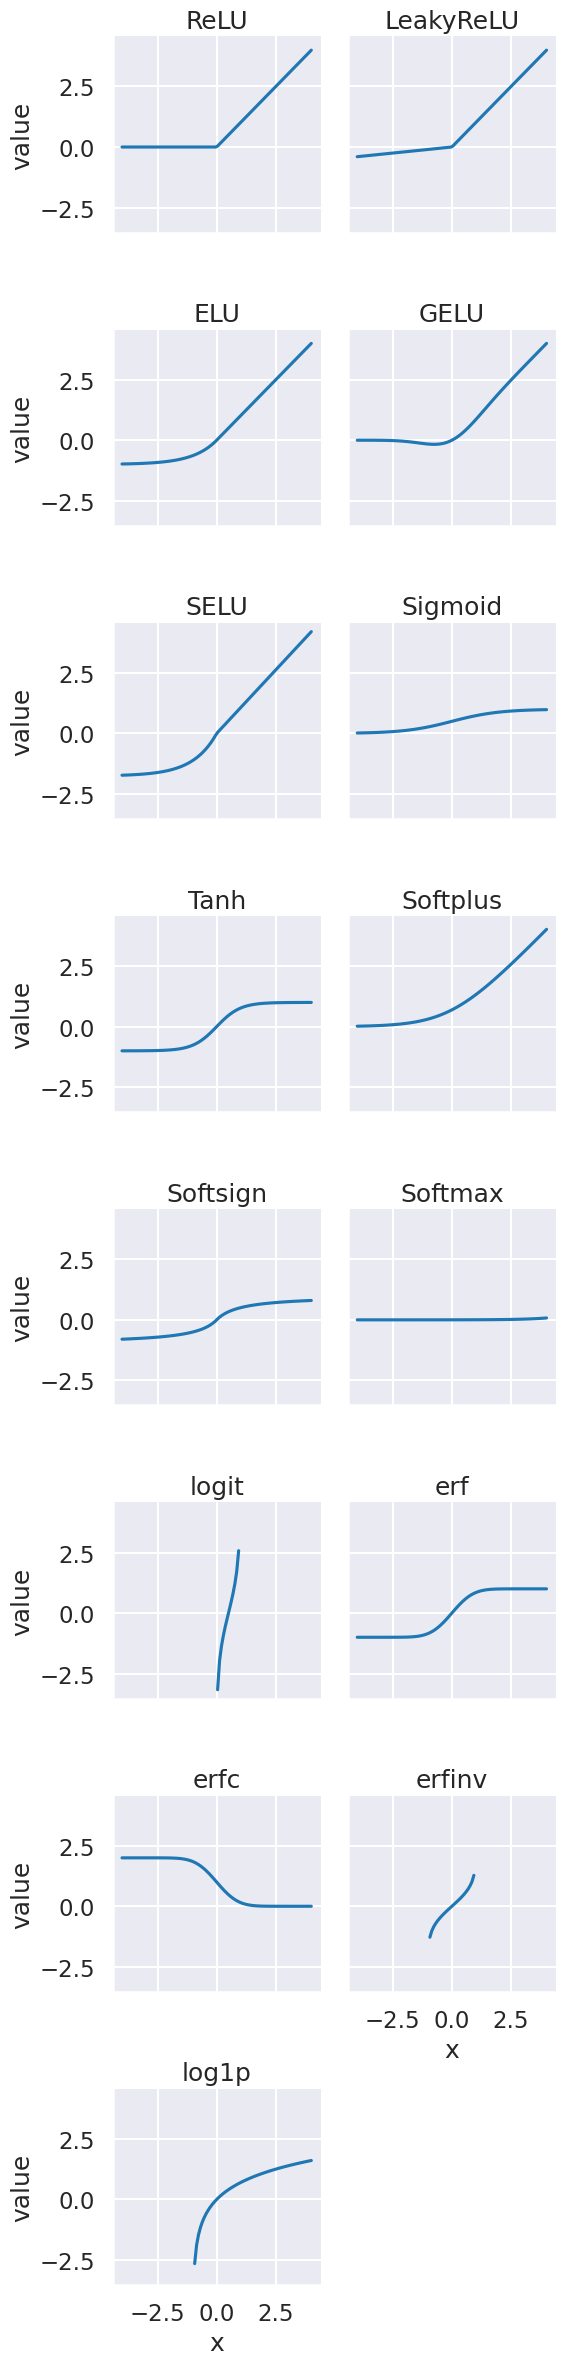

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.special
from torch import nn

# Define the input tensor
x = torch.linspace(-4, 4, 100)

# Compute the output of each activation function for the input tensor
y = {}

# Activation functions from `torch.nn`.
y["ReLU"] = nn.functional.relu(x).detach().numpy()
y["LeakyReLU"] = nn.functional.leaky_relu(x, negative_slope=0.1).detach().numpy()
y["ELU"] = nn.functional.elu(x, alpha=1).detach().numpy()
y["GELU"] = nn.functional.gelu(x).detach().numpy()
y["SELU"] = nn.functional.selu(x).detach().numpy()
y["Sigmoid"] = nn.functional.sigmoid(x).detach().numpy()
y["Tanh"] = nn.functional.tanh(x).detach().numpy()
y["Softplus"] = nn.functional.softplus(x).detach().numpy()
y["Softsign"] = nn.functional.softsign(x).detach().numpy()
y["Softmax"] = nn.functional.softmax(x, dim=0).detach().numpy()

# Activation functions from `torch.special`.
y["logit"] = torch.special.logit(x).detach().numpy()
y["erf"] = torch.special.erf(x).detach().numpy()
y["erfc"] = torch.special.erfc(x).detach().numpy()
y["erfinv"] = torch.special.erfinv(x).detach().numpy()
y["log1p"] = torch.special.log1p(x).detach().numpy()

# Create a dataframe with the output of each activation function
data = pd.DataFrame({"x": x, **y}).melt(id_vars="x")

# Plot all in one figure with seaborn
sns.set_style("darkgrid")
sns.set_context("talk")
plt.figure(figsize=(12, 8))
sns.lineplot(x="x", y="value", hue="variable", data=data)
plt.show()

# Create a FacetGrid with the plots of each activation function
grid = sns.FacetGrid(data, col="variable", col_wrap=2, sharex=True, sharey=True)
grid.map(plt.plot, "x", "value")
grid.set_titles("{col_name}")
plt.show()

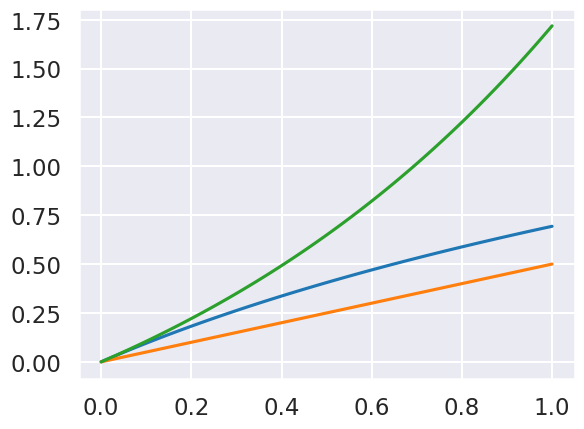

In [9]:
x = torch.linspace(0, 1, 100)
plt.plot(x, torch.log1p(x))
plt.plot(x, x / 2)
plt.plot(x, torch.expm1(x))

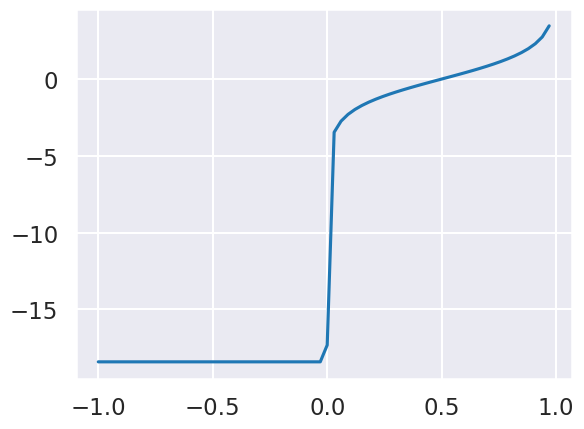

In [19]:
x = torch.linspace(-1, 2, 100)

plt.plot(x, torch.logit(x, eps=1e-8))